In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Final_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Source,destination,date_of_journey,fare,duration,arrival_time,departure_time,stops
0,0,Go First,BLR-Bengaluru,PNQ-Pune,2021-11-28,5177,1h 20m,19:00,17:40,Non Stop
1,1,SpiceJet,BLR-Bengaluru,PNQ-Pune,2021-11-28,5177,1h 25m,11:10,09:45,Non Stop
2,2,Go First,BLR-Bengaluru,PNQ-Pune,2021-11-28,5177,1h 30m,08:30,07:00,Non Stop
3,3,Go First,BLR-Bengaluru,PNQ-Pune,2021-11-28,5177,1h 30m,18:15,16:45,Non Stop
4,4,IndiGo,BLR-Bengaluru,PNQ-Pune,2021-11-28,5178,1h 35m,10:40,09:05,Non Stop


In [4]:
df.shape

(14697, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14697 entries, 0 to 14696
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       14697 non-null  int64 
 1   Name             14697 non-null  object
 2   Source           14697 non-null  object
 3   destination      14697 non-null  object
 4   date_of_journey  14697 non-null  object
 5   fare             14697 non-null  int64 
 6   duration         14697 non-null  object
 7   arrival_time     14697 non-null  object
 8   departure_time   14697 non-null  object
 9   stops            14697 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14697.0,7348.000000,4242.802788,0.0,3674.0,7348.0,11022.0,14696.0
fare,14697.0,11853.693135,5201.382071,3132.0,7624.0,11448.0,15154.0,51916.0


In [7]:
df.nunique()

Unnamed: 0         14697
Name                   6
Source                 4
destination            6
date_of_journey        7
fare                2619
duration             441
arrival_time         251
departure_time       241
stops                193
dtype: int64

In [8]:
df.isna().sum()

Unnamed: 0         0
Name               0
Source             0
destination        0
date_of_journey    0
fare               0
duration           0
arrival_time       0
departure_time     0
stops              0
dtype: int64

<AxesSubplot:>

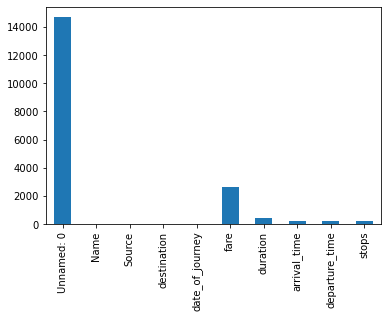

In [9]:
df.nunique().plot.bar()

Unnnamed is like a index no. column so i am gonna drop that column

## Univarite Analysis

<AxesSubplot:xlabel='Name', ylabel='count'>

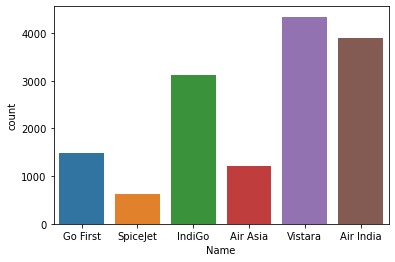

In [10]:
sns.countplot(df["Name"],data=df)

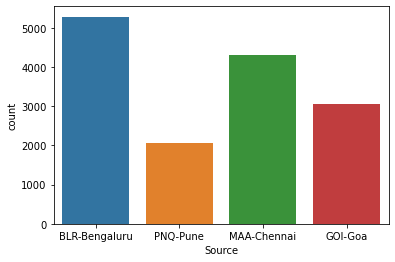

In [11]:
sns.countplot(df["Source"],data=df)
plt.show()

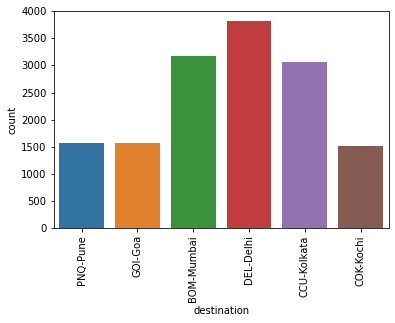

In [12]:
sns.countplot(df["destination"],data=df)
plt.xticks(rotation=90)
plt.show()

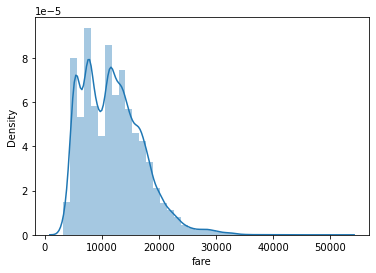

In [13]:
sns.distplot(df["fare"],bins=40)
plt.show()

as we can there is skewness in the Fare column

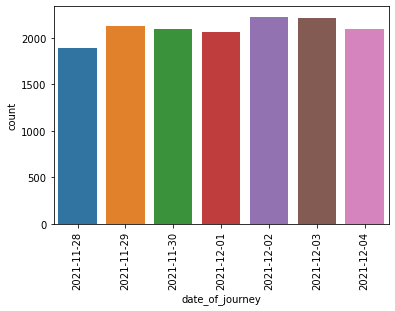

In [14]:
sns.countplot(df["date_of_journey"],data=df)
plt.xticks(rotation=90)
plt.show()

We have only 7 days data

#### Before Going any further i need to do some data cleaning here

In [15]:
df["stops"] = df["stops"].str.split(" ",1).str[0]
df["stops"] = df["stops"].replace("Non",0)
df["stops"] = df["stops"].astype("int")

In [16]:
df['date_of_journey'] =  pd.to_datetime(df['date_of_journey'], infer_datetime_format=True)

In [17]:
day = []
for i in df["date_of_journey"]:
    day.append(i.day_name())

df["week_day"] = day

## Bivariate Analysis

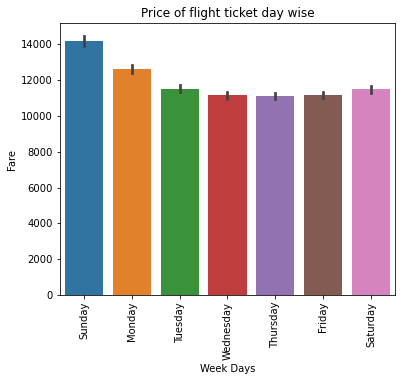

In [18]:
plt.figure(figsize=(6,5))
sns.barplot("week_day","fare",data=df)
plt.title("Price of flight ticket day wise")
plt.xlabel("Week Days")
plt.ylabel("Fare")
plt.xticks(rotation=90)
plt.show()

As we can see price is exceptionally high on **Sunday, Monday and saturday**. May be because most people prefer to travel on weekend and and remaining days fare is low as compare to weekends and Monday1.

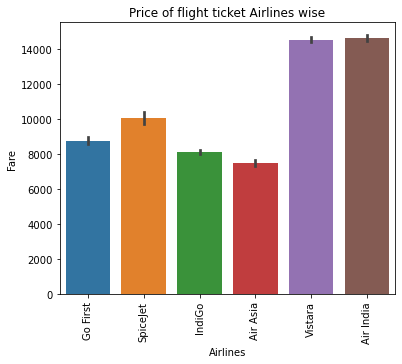

In [19]:
plt.figure(figsize=(6,5))
sns.barplot("Name","fare",data=df)
plt.title("Price of flight ticket Airlines wise")
plt.xlabel("Airlines")
plt.ylabel("Fare")
plt.xticks(rotation=90)
plt.show()

As we can see that **Indigo and Air Asia** fare is low as compare to other airlines

In [20]:
# Separating code and Airport City Name
df["Source"] = df["Source"].str.split("-",1).str[-1]
df["destination"] = df["destination"].str.split("-",1).str[-1]

In [21]:
# Making a new column containing Source and destination
source_and_destination = []
for i,j in zip(df["Source"],df["destination"]):
    source_and_destination.append(i+" to "+j)
df["Source+Destination"] = source_and_destination

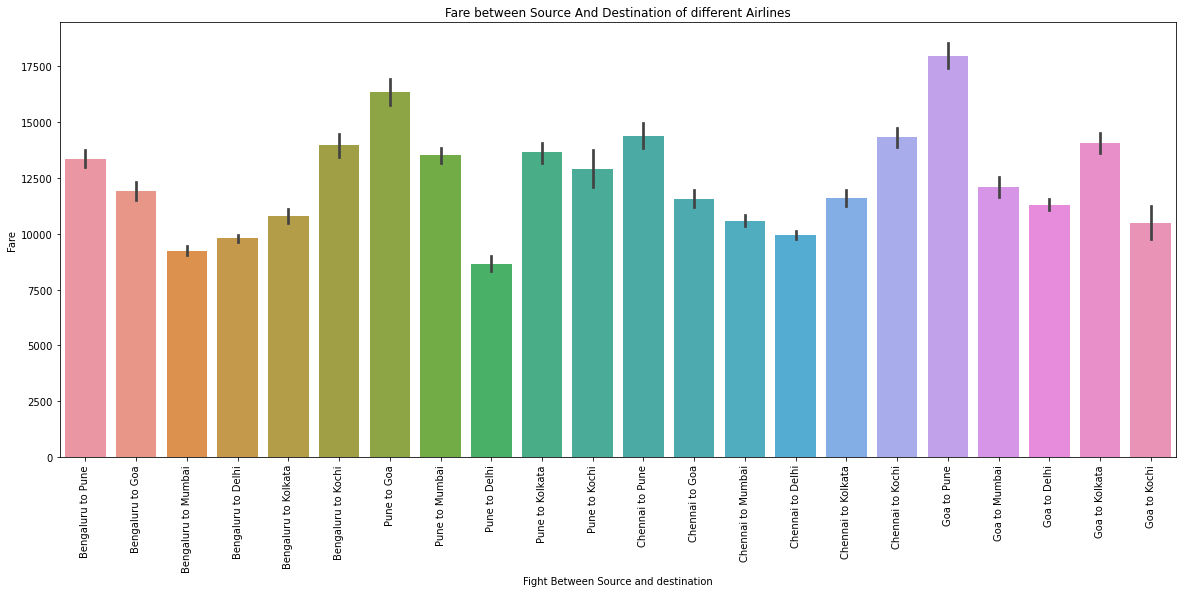

In [22]:
plt.figure(figsize=(20,8))
sns.barplot("Source+Destination","fare",data=df)
plt.title("Fare between Source And Destination of different Airlines")
plt.xlabel("Fight Between Source and destination")
plt.ylabel("Fare")
plt.xticks(rotation=90)    
plt.show()

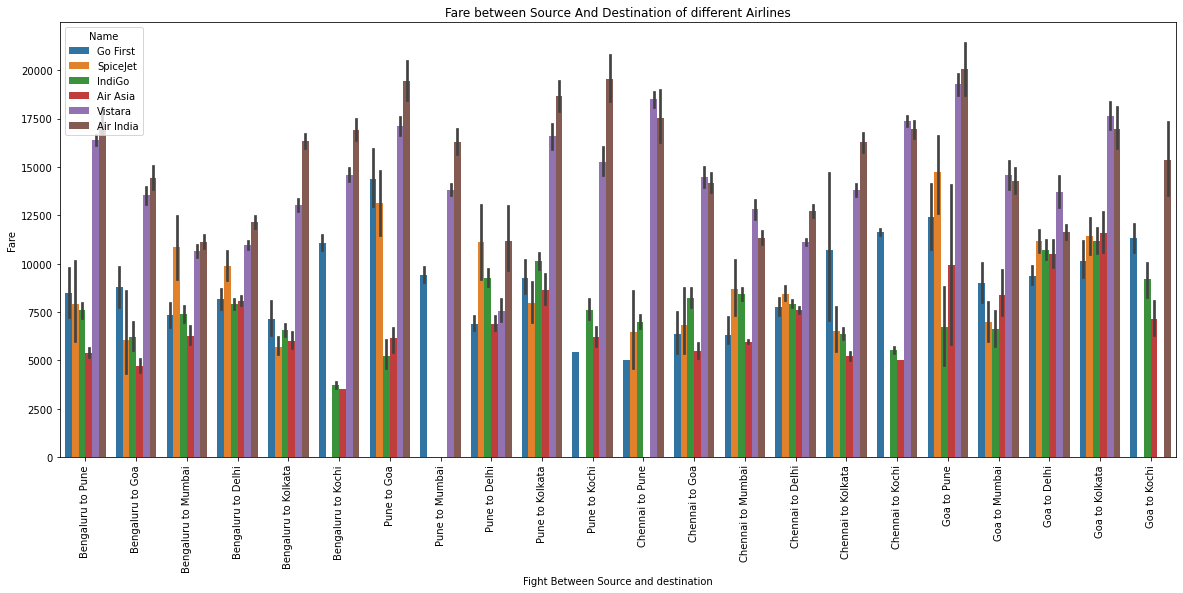

In [23]:
plt.figure(figsize=(20,8))
sns.barplot("Source+Destination","fare",data=df,hue="Name")
plt.title("Fare between Source And Destination of different Airlines")
plt.xlabel("Fight Between Source and destination")
plt.ylabel("Fare")
plt.xticks(rotation=90)    
plt.show()

As we can see **Air India** Fare is high all the time as compared to other Airlines except Goa to kolkata where Vistara has higher fare

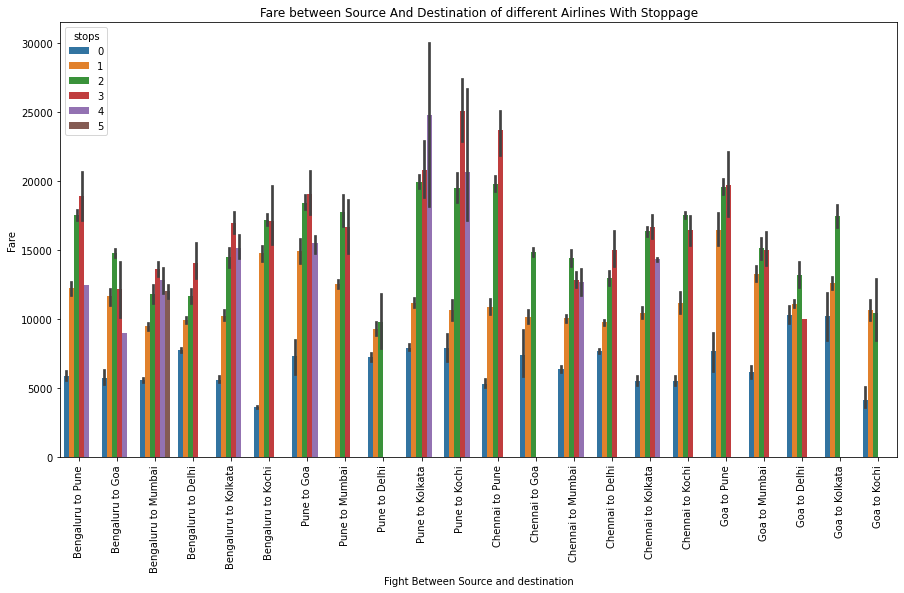

In [24]:
plt.figure(figsize=(15,8))
sns.barplot("Source+Destination","fare",data=df,hue="stops")
plt.title("Fare between Source And Destination of different Airlines With Stoppage")
plt.xlabel("Fight Between Source and destination")
plt.ylabel("Fare")
plt.xticks(rotation=90)    
plt.show()

**`As with the no. of stopage the fare of the Filght is also going up. And from above graph we can see that Non stop flight fare is much lesser as compare to flight with stops`**

<AxesSubplot:xlabel='fare', ylabel='Density'>

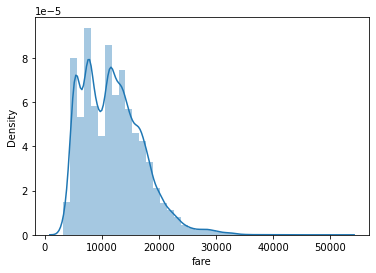

In [25]:
sns.distplot(df["fare"],bins=40)

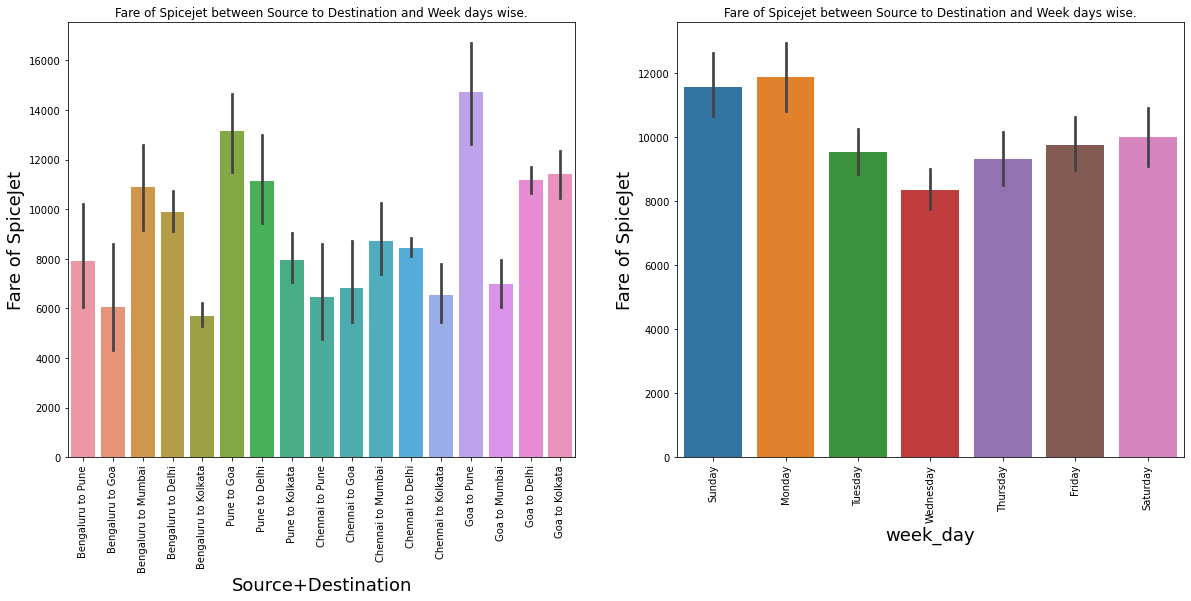

In [26]:
plt.figure(figsize=(20,8))
plotnumber =1
for i in df[["Source+Destination","week_day"]]:
    if plotnumber <3:
        ax = plt.subplot(1,2,plotnumber)
        sns.barplot(i,"fare",data=df.loc[df["Name"]=="SpiceJet"])
        plt.title("Fare of Spicejet between Source to Destination and Week days wise.",fontsize=12)
        plt.xlabel(i,fontsize=18)
        plt.ylabel("Fare of SpiceJet",fontsize=18)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.show()

Fare between Goa and Pune is higher of SpiceJet. And According to 2nd graph we can see that the fare of the Airlines is higher on Sunday and Monday as compared to other days

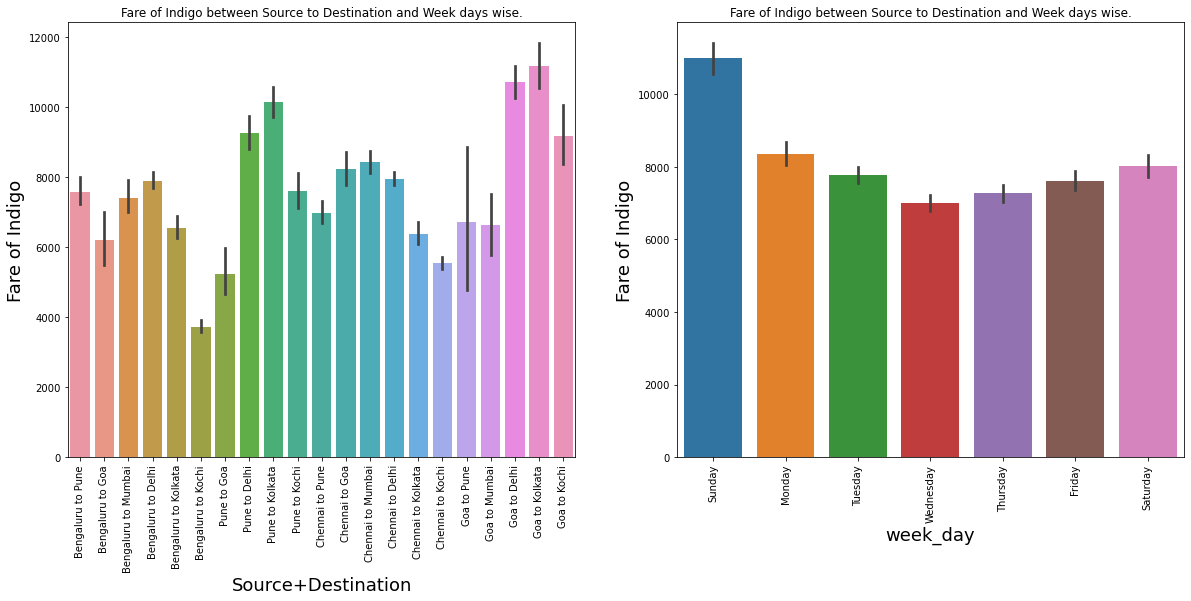

In [27]:
plt.figure(figsize=(20,8))
plotnumber =1
for i in df[["Source+Destination","week_day"]]:
    if plotnumber <3:
        ax = plt.subplot(1,2,plotnumber)
        sns.barplot(i,"fare",data=df.loc[df["Name"]=="IndiGo"])
        plt.title("Fare of Indigo between Source to Destination and Week days wise.",fontsize=12)
        plt.xlabel(i,fontsize=18)
        plt.ylabel("Fare of Indigo",fontsize=18)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.show()

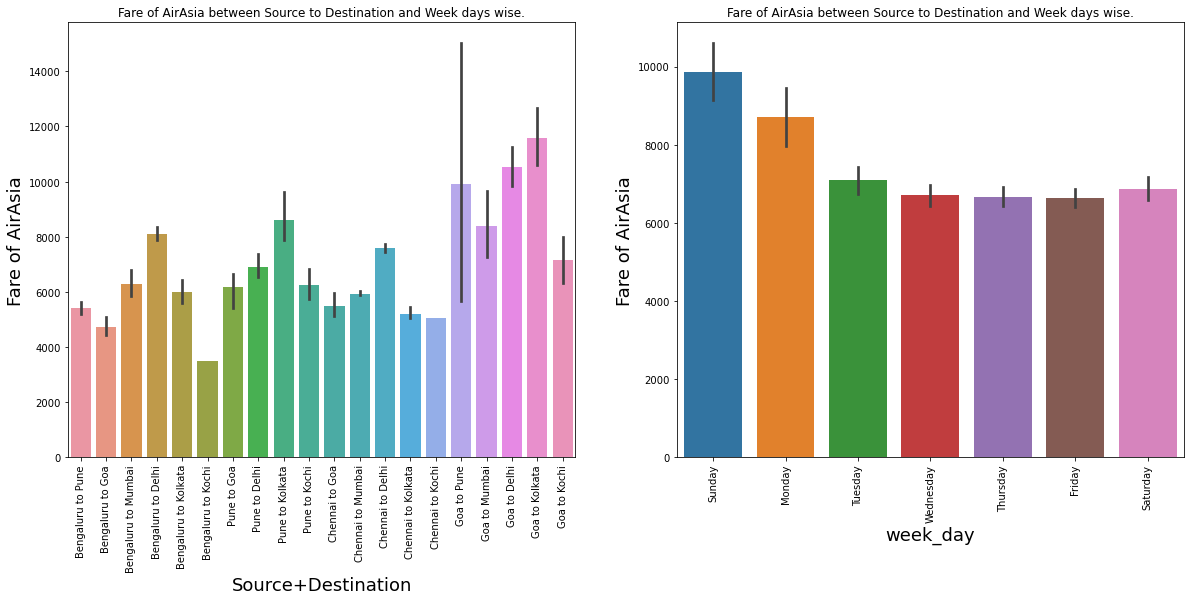

In [28]:
plt.figure(figsize=(20,8))
plotnumber =1
for i in df[["Source+Destination","week_day"]]:
    if plotnumber <3:
        ax = plt.subplot(1,2,plotnumber)
        sns.barplot(i,"fare",data=df.loc[df["Name"]=="Air Asia"])
        plt.title("Fare of AirAsia between Source to Destination and Week days wise.",fontsize=12)
        plt.xlabel(i,fontsize=18)
        plt.ylabel("Fare of AirAsia",fontsize=18)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.show()

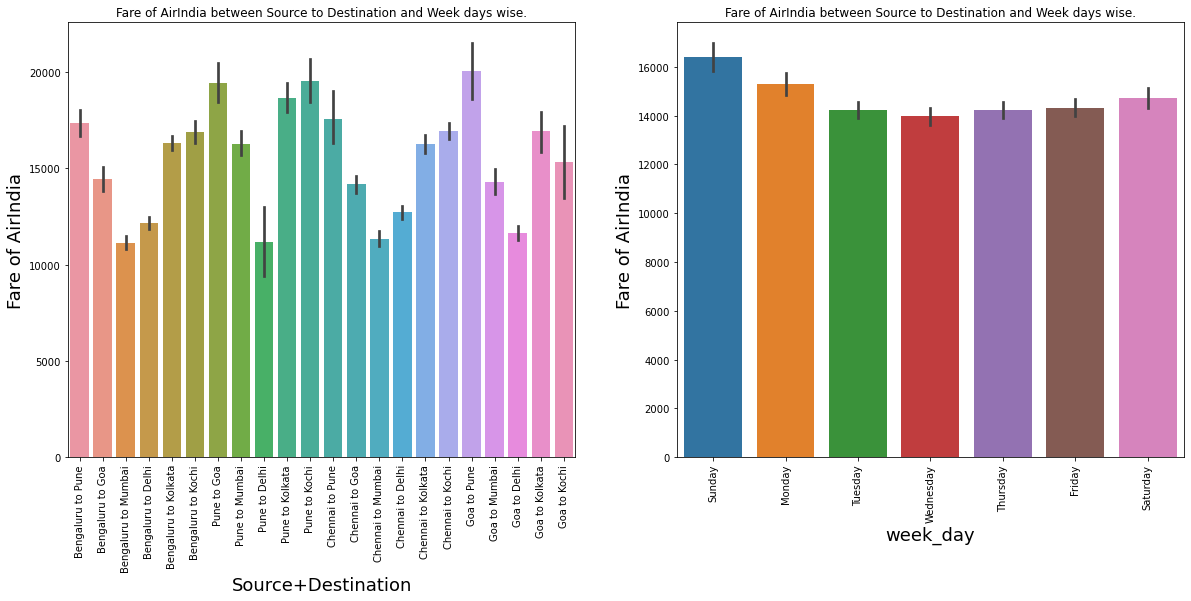

In [29]:
plt.figure(figsize=(20,8))
plotnumber =1
for i in df[["Source+Destination","week_day"]]:
    if plotnumber <3:
        ax = plt.subplot(1,2,plotnumber)
        sns.barplot(i,"fare",data=df.loc[df["Name"]=="Air India"])
        plt.title("Fare of AirIndia between Source to Destination and Week days wise.",fontsize=12)
        plt.xlabel(i,fontsize=18)
        plt.ylabel("Fare of AirIndia",fontsize=18)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.show()

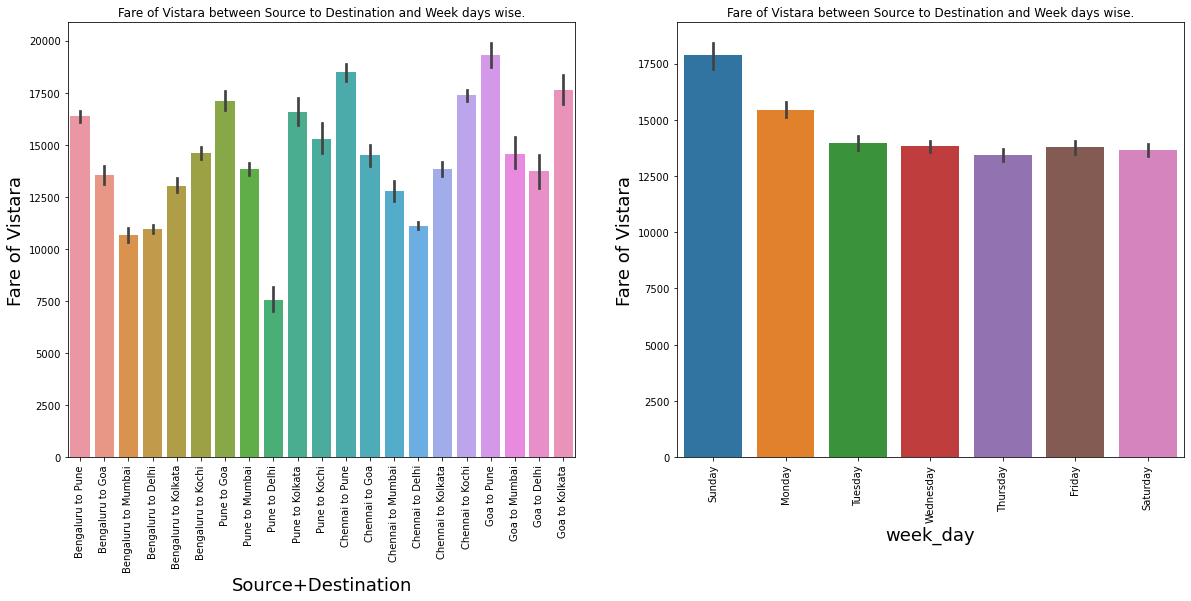

In [30]:
plt.figure(figsize=(20,8))
plotnumber =1
for i in df[["Source+Destination","week_day"]]:
    if plotnumber <3:
        ax = plt.subplot(1,2,plotnumber)
        sns.barplot(i,"fare",data=df.loc[df["Name"]=="Vistara"])
        plt.title("Fare of Vistara between Source to Destination and Week days wise.",fontsize=12)
        plt.xlabel(i,fontsize=18)
        plt.ylabel("Fare of Vistara",fontsize=18)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.show()

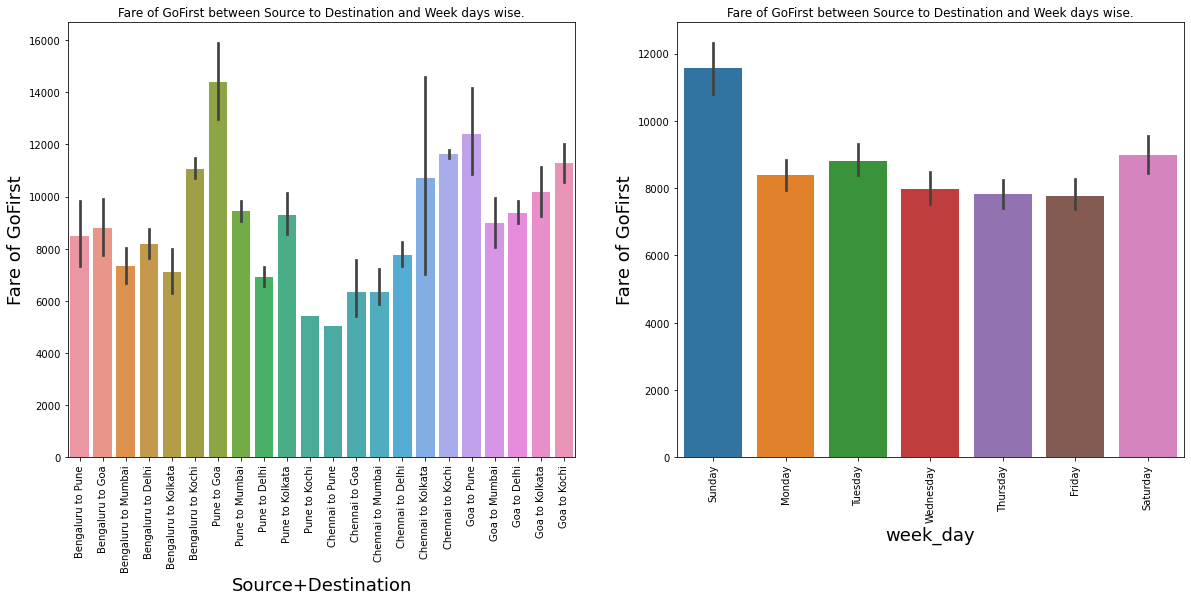

In [31]:
plt.figure(figsize=(20,8))
plotnumber =1
for i in df[["Source+Destination","week_day"]]:
    if plotnumber <3:
        ax = plt.subplot(1,2,plotnumber)
        sns.barplot(i,"fare",data=df.loc[df["Name"]=="Go First"])
        plt.title("Fare of GoFirst between Source to Destination and Week days wise.",fontsize=12)
        plt.xlabel(i,fontsize=18)
        plt.ylabel("Fare of GoFirst",fontsize=18)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.show()

From Above all the Graph of airlines wise. Prices of ticket between Pune and Goa is Higher as comapred to other source and destination. And if we see days wise data we can see that the fare is higher On **Sunday, Monday and Saturday** and Flight fare is less on **Wednesday** as compare to other day 

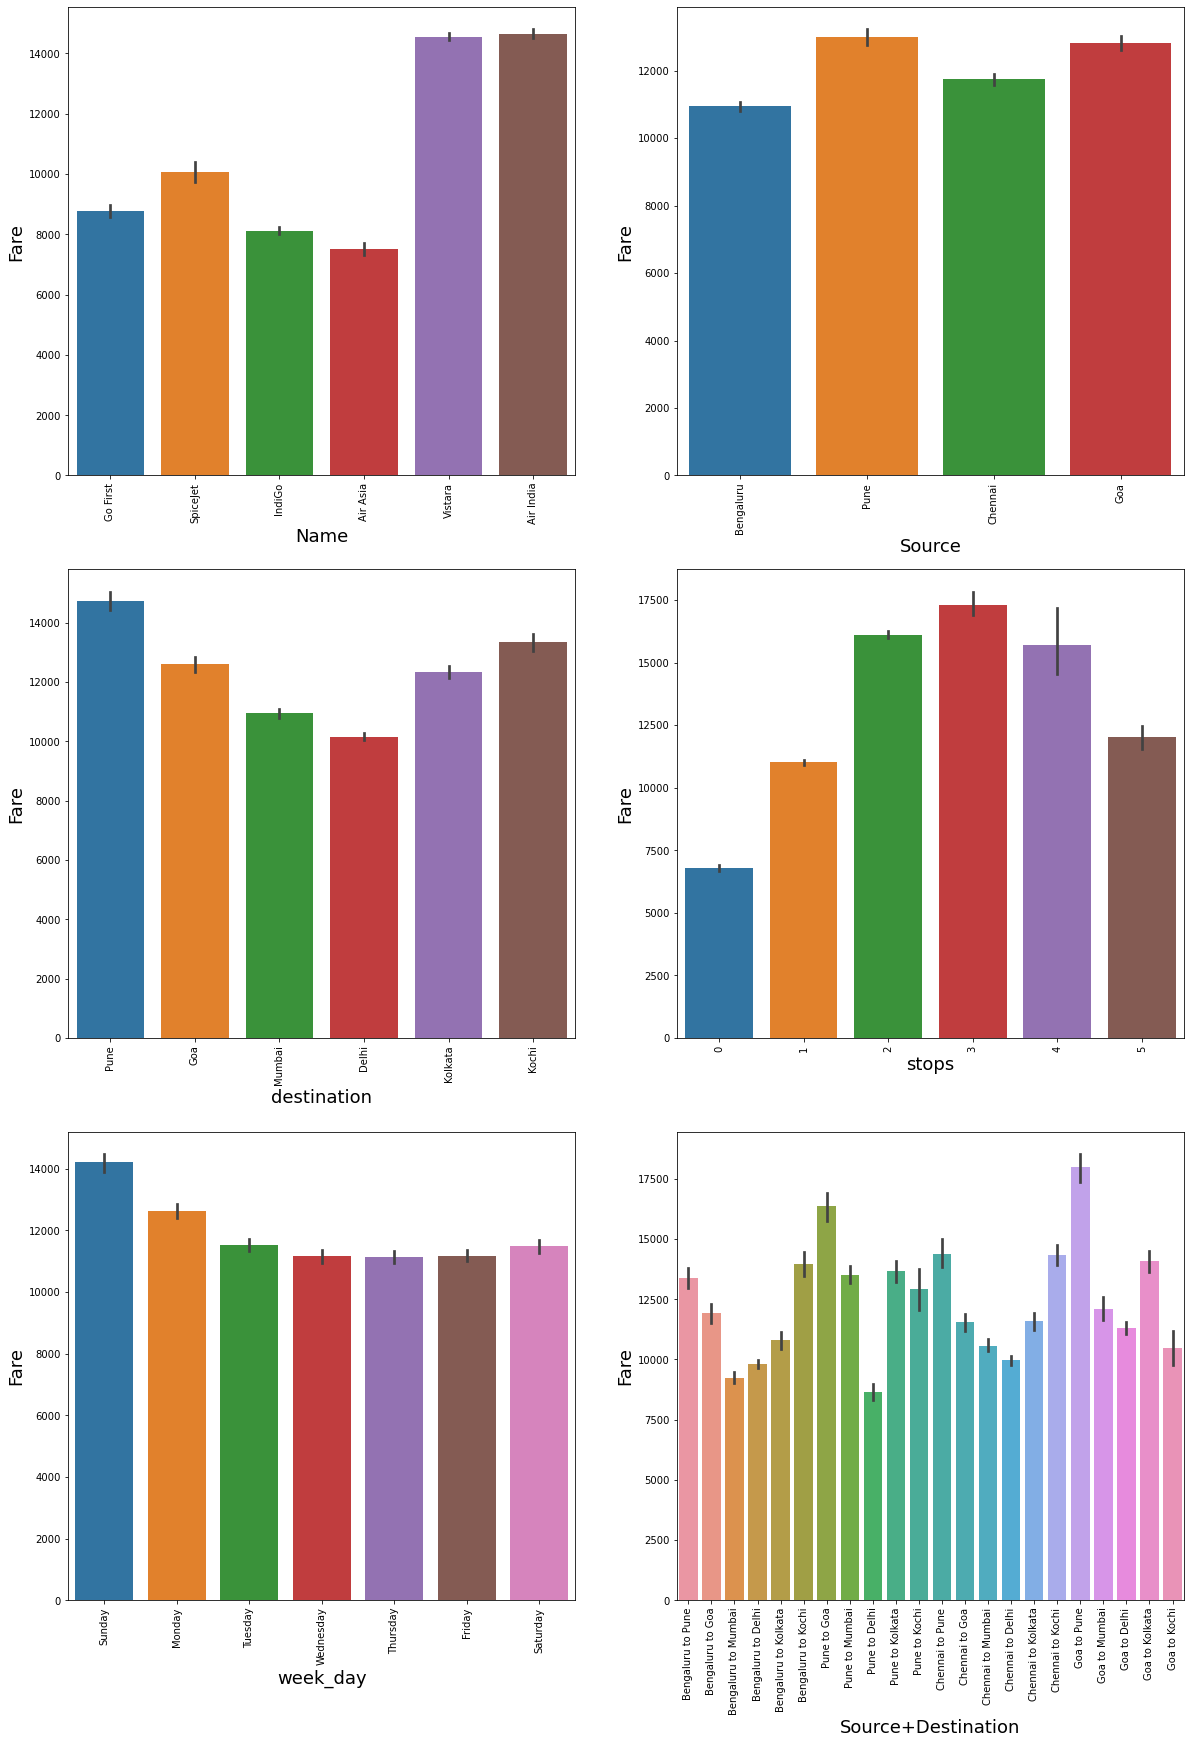

In [32]:
plt.figure(figsize=(20,50))
plotnumber =1
for i in df.drop(['Unnamed: 0','fare','duration',"arrival_time","departure_time","date_of_journey"],axis=1):
    if plotnumber <11:
        ax = plt.subplot(5,2,plotnumber)
        sns.barplot(i,"fare",data=df)
        plt.xlabel(i,fontsize=18)
        plt.ylabel("Fare",fontsize=18)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.show()

As the no. of stops increases till 3 stops the price of the ticket is also increasing But after 3 stops the price of the fare start declining

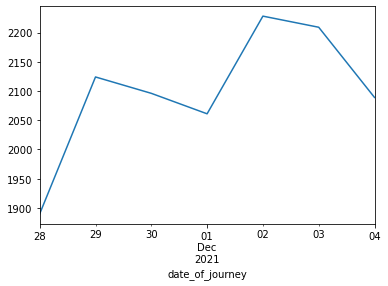

In [33]:
new = df.groupby(["date_of_journey"]).count()["fare"]
new.plot()
plt.show()

In [34]:
# separating the hours and minute from Duration and making two new features
duration = list(df["duration"])

for i in range(0,len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() +" 0m"
        else:
            duration[i] = "0h " +duration[i]

duration_hours = []
duration_min = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

    
    
df["duration_hours"] = duration_hours
df["duration_min"] = duration_min

In [35]:
df["arrival_time"] = pd.to_datetime(df["arrival_time"])
df['Arrival_hour'] = df["arrival_time"].dt.hour
df['Arrival_min'] = df["arrival_time"].dt.minute

In [36]:
df["date_of_journey"] = pd.to_datetime(df["date_of_journey"])
df["Day"] =df["date_of_journey"].dt.day
df["Month"] =df["date_of_journey"].dt.month
df["Year"] =df["date_of_journey"].dt.year

In [37]:
df["departure_time"] = pd.to_datetime(df["departure_time"])
df['departure_hour'] = df["departure_time"].dt.hour
df['departure_min'] = df["departure_time"].dt.minute

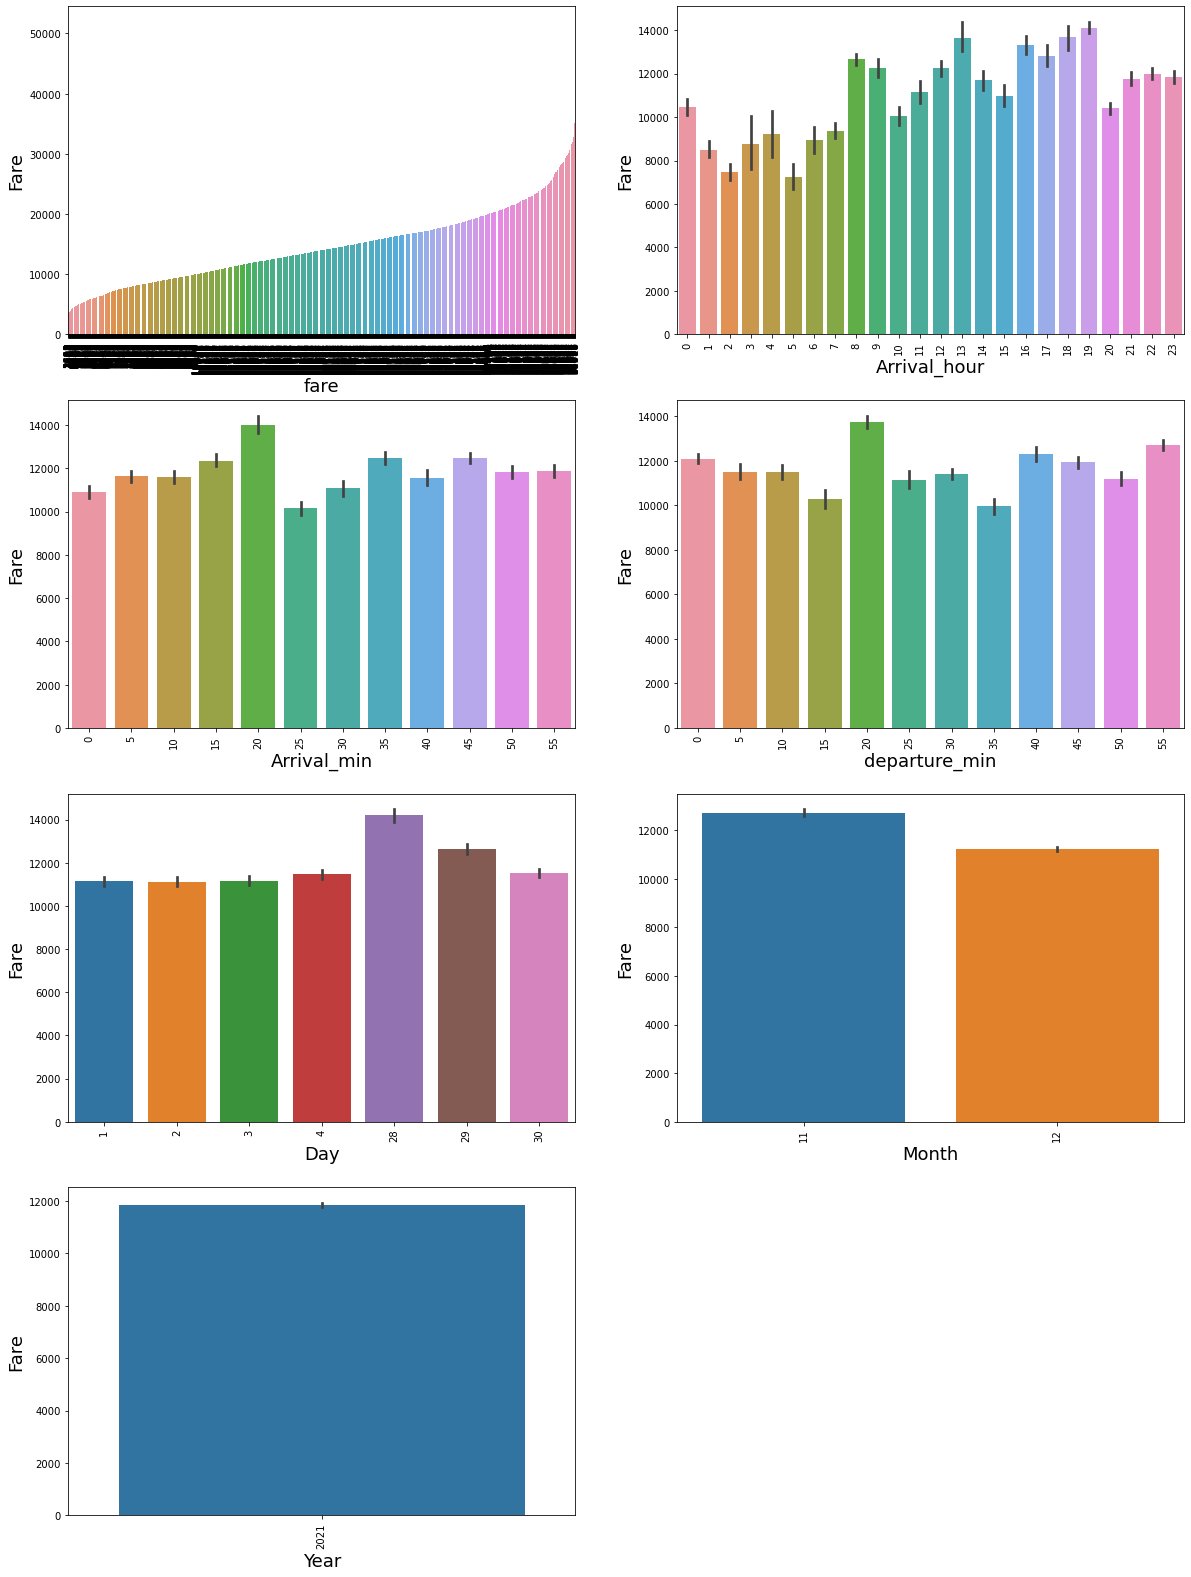

In [38]:
plt.figure(figsize=(20,35))
plotnumber =1
for i in df[['fare',"Arrival_hour","Arrival_min","departure_min","Day","Month","Year"]]:
    if plotnumber <11:
        ax = plt.subplot(5,2,plotnumber)
        sns.barplot(df[i],df["fare"])
        plt.xlabel(i,fontsize=18)
        plt.ylabel("Fare",fontsize=18)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.show()

If we see the Day graph we can see that the fare of the airlines of the very next day or following 2-3 days is higher and when we move far from the current date the price of the ticket is decreases. Or we can say that if we book ticket prior one or two month before the date_of_journey the ticket fair will cost us less expensive as compared to urgent booking

In [39]:
# Dropping all the columns which is not needed any longer and Source+Destination as well which is created for EDA
df.drop(columns=["arrival_time","duration","date_of_journey","Source+Destination","departure_time"],axis=1,inplace=True)

In [40]:
df = pd.get_dummies(df.drop("week_day",axis=1),drop_first=True)

pd.set_option("display.max_columns",None)

### Multivariate Analysis

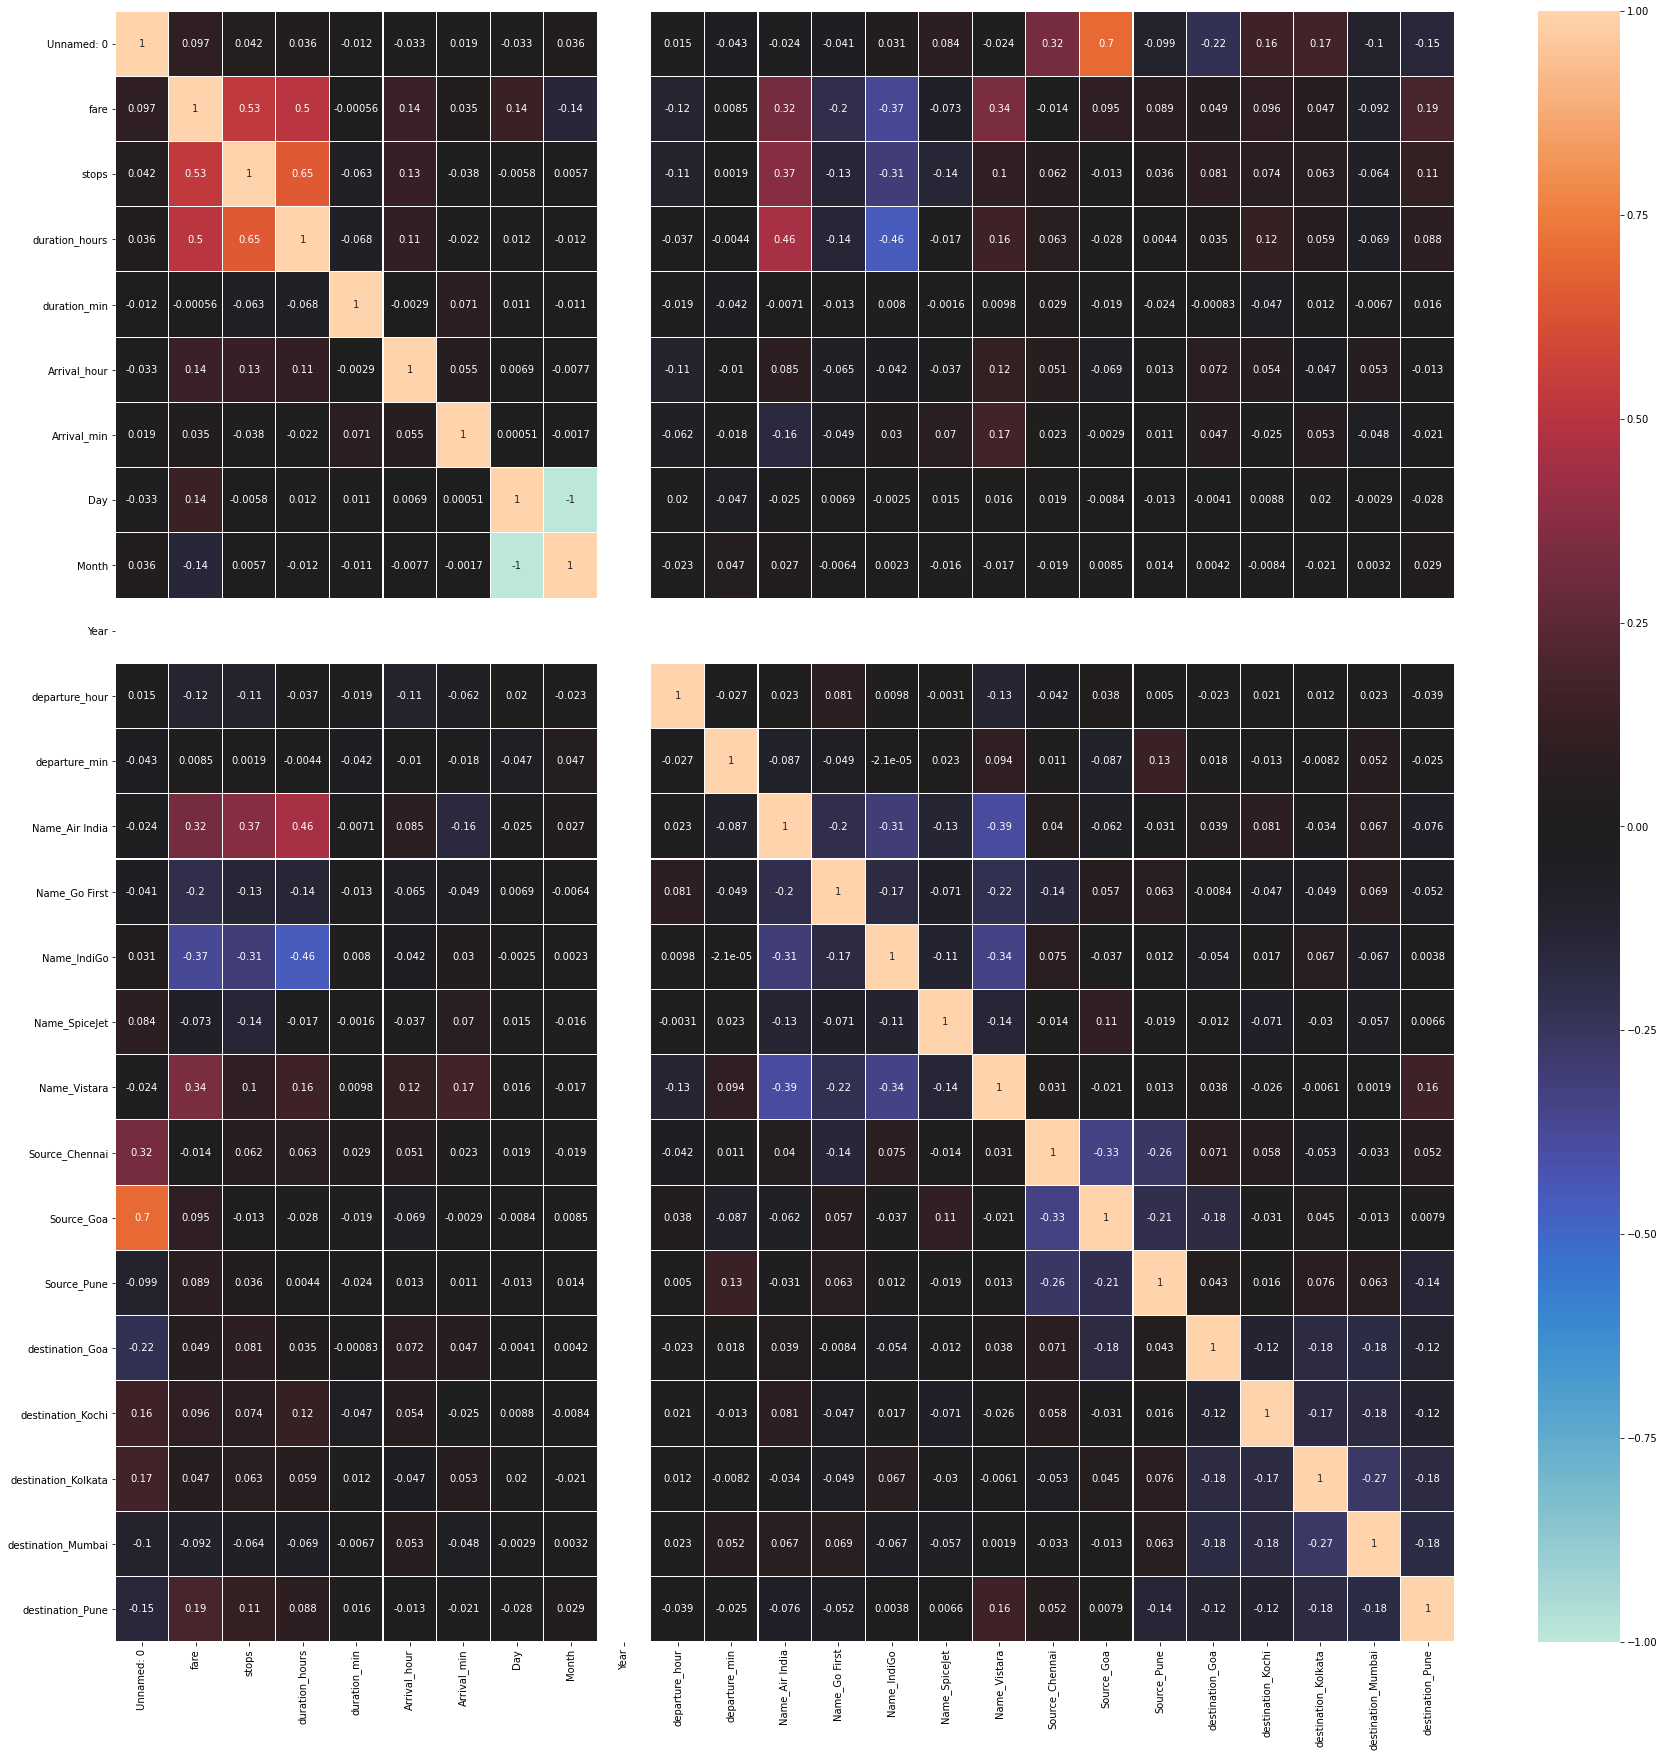

In [41]:
df_corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(df_corr,vmin=-1,vmax=1,fmt='.2g',linewidths=0.1,annot=True,center=0)
plt.show()

It seems that Day and Month has negative multicolinearity.

**Year** has no correlation with the target Variable

In [42]:
df_corr = df.corr()["fare"].abs()
df_corr

Unnamed: 0             0.097244
fare                   1.000000
stops                  0.528571
duration_hours         0.501981
duration_min           0.000557
Arrival_hour           0.141368
Arrival_min            0.034617
Day                    0.137709
Month                  0.142334
Year                        NaN
departure_hour         0.118112
departure_min          0.008547
Name_Air India         0.323114
Name_Go First          0.198354
Name_IndiGo            0.372927
Name_SpiceJet          0.072625
Name_Vistara           0.336473
Source_Chennai         0.014149
Source_Goa             0.095138
Source_Pune            0.089489
destination_Goa        0.049276
destination_Kochi      0.096275
destination_Kolkata    0.047043
destination_Mumbai     0.091889
destination_Pune       0.191483
Name: fare, dtype: float64

### Data Cleaning

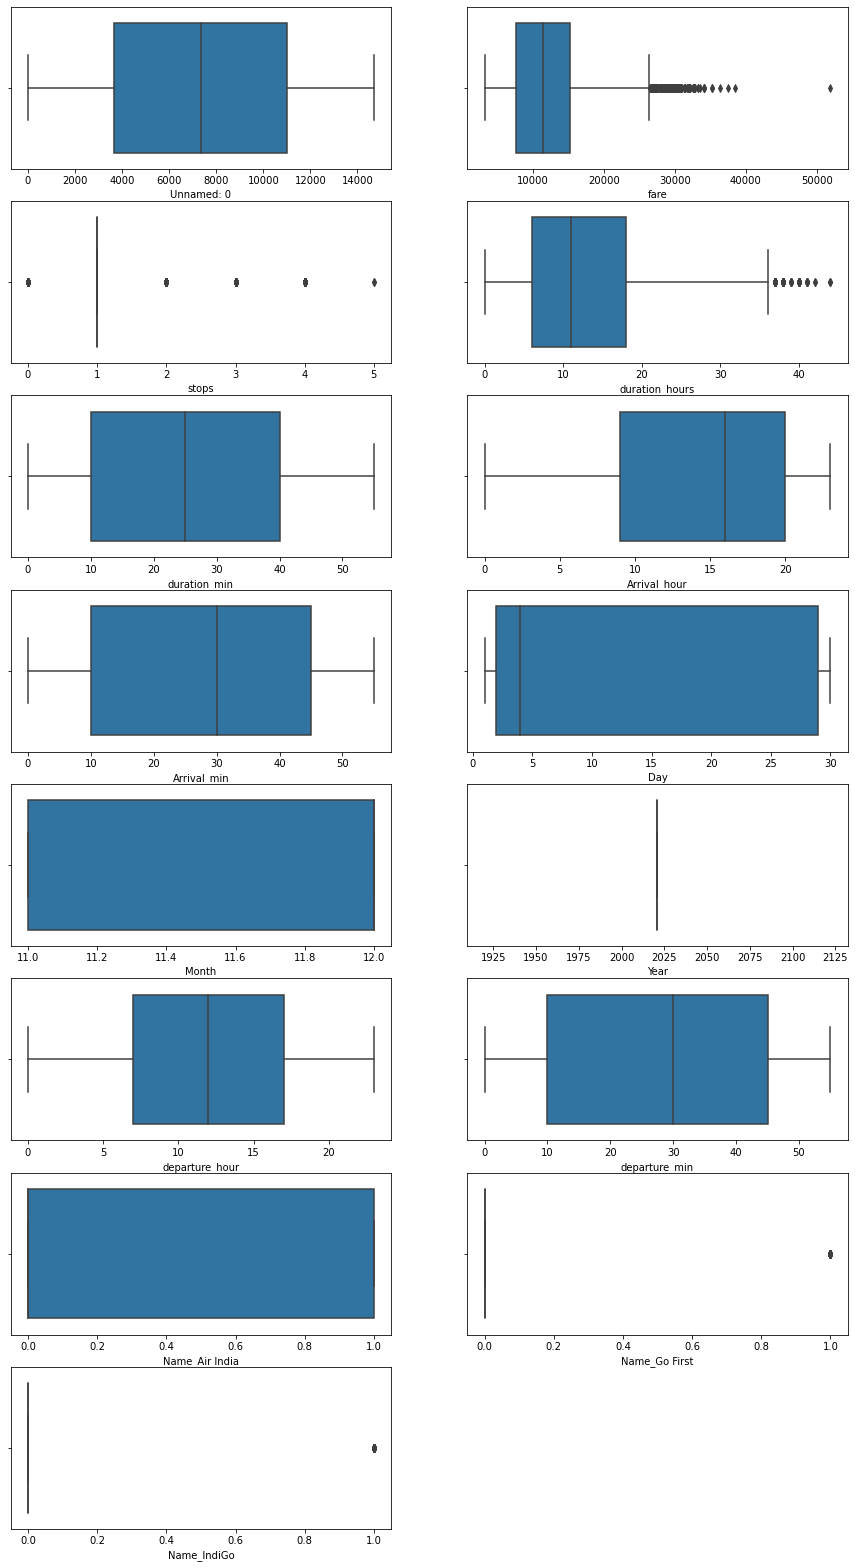

In [43]:
#Checking Outliers using Boxplot
plotnumber=1
plt.figure(figsize=(15,28))
for i in df:
    if plotnumber <16:
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1
plt.show()

As we can see Only Fare, Stops and duration_hours has outliers. Fare is our target column whereas stops is discrete columns

In [44]:
df.skew()

Unnamed: 0             0.000000
fare                   0.785478
stops                  0.593872
duration_hours         0.758317
duration_min           0.040465
Arrival_hour          -0.558067
Arrival_min           -0.018230
Day                    0.334223
Month                 -0.342002
Year                   0.000000
departure_hour         0.017831
departure_min         -0.060375
Name_Air India         1.061389
Name_Go First          2.657770
Name_IndiGo            1.405307
Name_SpiceJet          4.522353
Name_Vistara           0.896125
Source_Chennai         0.911591
Source_Goa             1.440013
Source_Pune            2.074061
destination_Goa        2.549459
destination_Kochi      2.620714
destination_Kolkata    1.431889
destination_Mumbai     1.383122
destination_Pune       2.550617
dtype: float64

Arrival_hour, duration_hours and fare is having skewness

* Fare is our target columns
* Arrival_hour and duration_hours is time columns and it is also possible that they might have Outliers. But still i need to confirm the same

In [45]:
q1=df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

upper_limit = q3["duration_hours"] + (1.5*iqr["duration_hours"])
index = np.where(df["duration_hours"] > upper_limit)



In [46]:
df.drop(df.index[index],axis=0,inplace=True)

In [47]:
print("Data loss is",((14697-df.shape[0])/14697)*100,"Percent")

Data loss is 0.8301013812342655 Percent


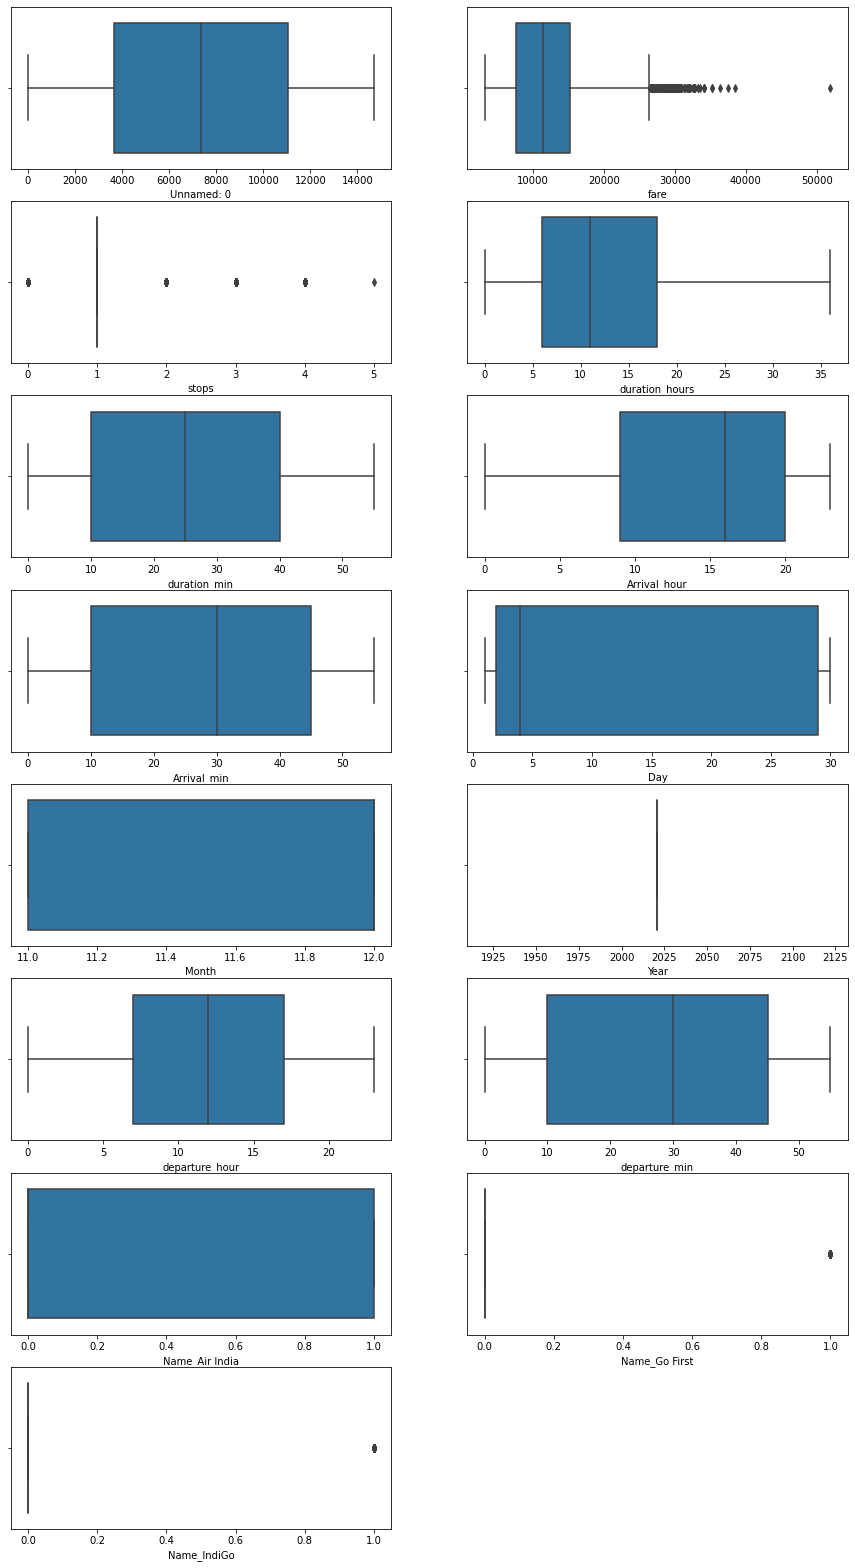

In [48]:
#Checking Outliers using Boxplot
plotnumber=1
plt.figure(figsize=(15,28))
for i in df:
    if plotnumber <16:
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1
plt.show()

Not removing Outliers from Stops and remaining columns because they are either discrete or categorical columns

In [49]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[["duration_hours","Arrival_hour","stops"]] = pt.fit_transform(df[["duration_hours","Arrival_hour","stops"]])

In [50]:
df.skew()

Unnamed: 0             0.002011
fare                   0.798553
stops                  0.041434
duration_hours        -0.065741
duration_min           0.034212
Arrival_hour          -0.398755
Arrival_min           -0.020615
Day                    0.336297
Month                 -0.344090
Year                   0.000000
departure_hour         0.004084
departure_min         -0.061468
Name_Air India         1.087725
Name_Go First          2.642381
Name_IndiGo            1.392374
Name_SpiceJet          4.500866
Name_Vistara           0.891776
Source_Chennai         0.919002
Source_Goa             1.431639
Source_Pune            2.064993
destination_Goa        2.536674
destination_Kochi      2.631191
destination_Kolkata    1.435216
destination_Mumbai     1.382972
destination_Pune       2.556472
dtype: float64

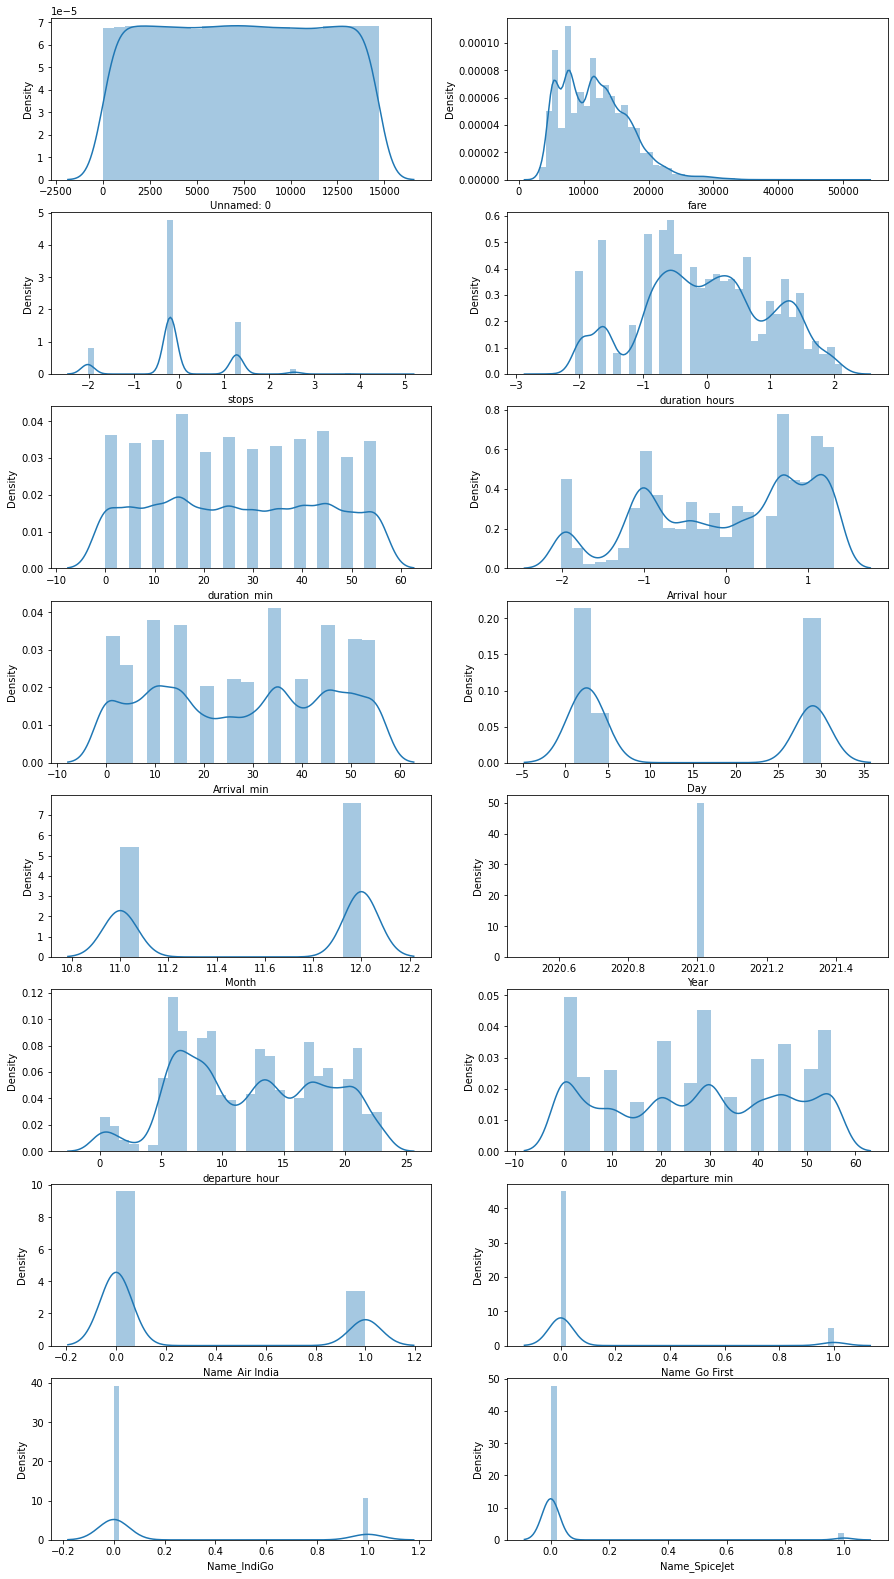

In [51]:
#Checking Outliers using Boxplot
plotnumber=1
plt.figure(figsize=(15,28))
for i in df:
    if plotnumber < 17:
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(df[i])
    plotnumber+=1
plt.show()

In [52]:
# Splitting dataset for model building
x = df.drop("fare",axis=1)
y= df["fare"]

In [53]:
# Importing libraries for model building
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split,KFold
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB

In [54]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [55]:
# Finding the best accuracy and Random State
max_accu = []
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = GradientBoostingRegressor()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = r2_score(y_test,y_pred)
    max_accu.append(accu_score)
max_value = max(max_accu)
print("Max_accuracy :",max(max_accu),"Best Random State :", max_accu.index(max_value)+1)

Max_accuracy : 0.7377122182859941 Best Random State : 27


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=27)

In [57]:
kf = KFold(n_splits=5,shuffle=True,random_state=27)

In [58]:
diff = []
r2 = []
cross = []

### GradientBoosting

In [59]:
gbc = GradientBoostingRegressor(n_estimators=500,min_samples_split=3)
gbc.fit(x_train,y_train)

GradientBoostingRegressor(min_samples_split=3, n_estimators=500)

In [60]:
y_pred = gbc.predict(x_test)

In [61]:
r = r2_score(y_test,y_pred)
c = cross_val_score(gbc,x_scaled,y,cv=kf).mean()

In [62]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [63]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Training score :",gbc.score(x_train,y_train),)

 R2 Score is : 0.8312881730527241 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.8207891976801441 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Training score : 0.8526124633123078


### Bagging Regressor

In [64]:
bag_reg = BaggingRegressor(n_estimators=200)
bag_reg.fit(x_train,y_train)

BaggingRegressor(n_estimators=200)

In [65]:
y_pred = bag_reg.predict(x_test)

In [66]:
r = r2_score(y_test,y_pred)
c = cross_val_score(bag_reg,x_scaled,y,cv=kf).mean()

In [67]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [68]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Training score :",bag_reg.score(x_train,y_train),)

 R2 Score is : 0.8902490795441946 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.8840197710746004 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Training score : 0.9814552973198455


### XGBRegressor

In [69]:
xgb = XGBRegressor(max_depth=8,learning_rate=0.1)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
y_pred = xgb.predict(x_test)

In [71]:
r = r2_score(y_test,y_pred)
c = cross_val_score(xgb,x_scaled,y,cv=kf).mean()

In [72]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [73]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Training score :",xgb.score(x_train,y_train),)

 R2 Score is : 0.8898413894040613 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.8847309870270884 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Training score : 0.9489926200637169


### RandomForestRegressor

In [74]:
rf = RandomForestRegressor(n_estimators=200,min_samples_split=4)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=200)

In [75]:
y_pred = rf.predict(x_test)

In [76]:
r = r2_score(y_test,y_pred)
c = cross_val_score(rf,x_scaled,y,cv=kf).mean()

In [77]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [78]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Training score :",rf.score(x_train,y_train),)

 R2 Score is : 0.8890972882948567 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.8822154251302654 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Training score : 0.9720610222048879


### DecisionTreeRegressor

In [79]:
dt = DecisionTreeRegressor(max_depth=10,min_samples_split=4)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=4)

In [80]:
y_pred = dt.predict(x_test)

In [81]:
r = r2_score(y_test,y_pred)
c = cross_val_score(dt,x_scaled,y,cv=kf).mean()

In [82]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [83]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Training score :",dt.score(x_train,y_train),)

 R2 Score is : 0.7542625729621902 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.7412408030968738 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Training score : 0.8175052263449207


In [84]:
models = ["Gradient Boosting","Bagging Regressor","XGB Regressor","Random Forest Regressor","Decision Tree Regressor"]

In [85]:
regressor = pd.DataFrame({"Model":models,"R2_score":r2,"Cross_validation_score":cross,"Difference":diff})
regressor

,Model,R2_score,Cross_validation_score,Difference
0,Gradient Boosting,0.831288,0.820789,0.010499
1,Bagging Regressor,0.890249,0.884020,0.006229
2,XGB Regressor,0.889841,0.884731,0.005110
3,Random Forest Regressor,0.889097,0.882215,0.006882
4,Decision Tree Regressor,0.754263,0.741241,0.013022


### XGB regressor is giving the least difference between R2 score and cross validation score. So i am using Hyperparameter tuning to find the more best parameter to tune

In [88]:
xgb.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [89]:
# Hyperparameter Tuning
param = {"n_estimators":[200,100,500,400,600],
        "max_depth":[8,9,10,7],
        "learning_rate":[0.1,0.001,0.01],
        "random_state":[127,61,0,177],}

In [91]:
grid_search = GridSearchCV(estimator=xgb,param_grid=param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.1, max_delta_step=0,
                                    max_depth=8, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_par

In [92]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 600,
 'random_state': 127}

In [94]:
xgb = XGBRegressor(learning_rate=0.1,max_depth=7,n_estimators=600,random_state=127)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=600, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=127,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
y_pred = xgb.predict(x_test)

In [97]:
print("R2 score :",r2_score(y_test,y_pred),"\n","=-"*60,"\nCross validation report :",cross_val_score(xgb,x_scaled,y,cv=kf).mean())

R2 score : 0.9226112344340864 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
Cross validation report : 0.9205013645436899


In [98]:
import pickle
pickle.dump(xgb,open("Flight_price_prediction","wb"))

In [99]:
load_model = pickle.load(open("Flight_price_prediction","rb"))